# Experiment 1 - Hello World

### Description
* **Dataset** : CloPeMa CTU 'Flat and Wrinkled' and 'Folded' combined. Validation subset randomly chosen with a probabilty of 30%.
(https://drive.google.com/file/d/0B8Z1YBnBij8sYmpZanJ2a2VaSGs/view?usp=sharing)
* **

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import operator
import pandas as pd

In [19]:
DATASET_PATH = '/home/danfergo/SIG/Code/Experiments/data/clopema'

In [20]:
train_datagen = ImageDataGenerator(
)

validation_datagen = ImageDataGenerator(
)


train_generator = train_datagen.flow_from_directory(
        DATASET_PATH + '/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
)

Found 2366 images belonging to 9 classes.
Found 262 images belonging to 9 classes.


In [23]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3) ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('sigmoid'))

In [5]:
from IPython.display import SVG
from IPython.core.display import Image, display

# from keras.utils.visualize_util import model_to_dot

# SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Training

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [25]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=73,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=8,
        verbose=2)

Epoch 1/30
3s - loss: 3.1849 - acc: 0.1160 - val_loss: 2.0021 - val_acc: 0.3359
Epoch 2/30
3s - loss: 1.5213 - acc: 0.5285 - val_loss: 0.8527 - val_acc: 0.7739
Epoch 3/30
3s - loss: 1.0531 - acc: 0.6501 - val_loss: 0.5252 - val_acc: 0.8565
Epoch 4/30
3s - loss: 0.8062 - acc: 0.7381 - val_loss: 0.4942 - val_acc: 0.8870
Epoch 5/30
3s - loss: 0.6606 - acc: 0.7981 - val_loss: 0.4481 - val_acc: 0.8870
Epoch 6/30
3s - loss: 0.5254 - acc: 0.8384 - val_loss: 0.2696 - val_acc: 0.9391
Epoch 7/30
3s - loss: 0.4136 - acc: 0.8800 - val_loss: 0.2379 - val_acc: 0.9522
Epoch 8/30
3s - loss: 0.3847 - acc: 0.8929 - val_loss: 0.1885 - val_acc: 0.9565
Epoch 9/30
3s - loss: 0.3094 - acc: 0.9181 - val_loss: 0.1495 - val_acc: 0.9739
Epoch 10/30
3s - loss: 0.2834 - acc: 0.9172 - val_loss: 0.1154 - val_acc: 0.9826
Epoch 11/30
3s - loss: 0.2395 - acc: 0.9280 - val_loss: 0.1125 - val_acc: 0.9696
Epoch 12/30
3s - loss: 0.1943 - acc: 0.9460 - val_loss: 0.0558 - val_acc: 0.9826
Epoch 13/30
3s - loss: 0.1969 - acc: 

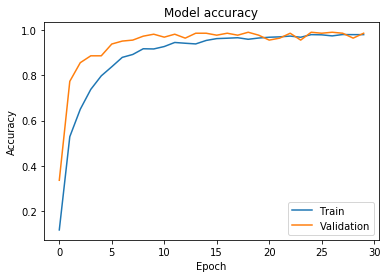

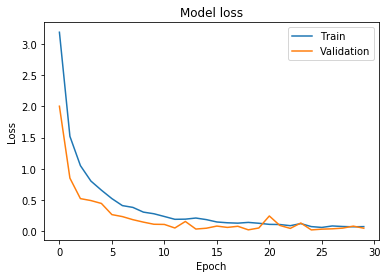

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Evaluation

In [27]:
test_datagen = ImageDataGenerator(
    # rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
        DATASET_PATH + '/validation',
        target_size=(150, 150),
        batch_size=256,
        class_mode='categorical'
)

Found 262 images belonging to 9 classes.


In [28]:
x_test, y_test = test_generator.next()

y_pred = model.predict_classes(x_test, batch_size=256)

256/256 [==============================] - 0s


In [29]:
class_indices = validation_generator.class_indices
sorted_class_indices = sorted(class_indices.items(), key=operator.itemgetter(1))
target_names = [x[0] for x in sorted_class_indices]

labels = range(0, len(target_names))
conf = confusion_matrix(np.argmax(y_test, axis=1), y_pred, labels)
pd.DataFrame(data = conf, index=target_names, columns=target_names)

,bluse,hoody,pants,polo,polo-long,skirt,towel,tshirt,tshirt-long
bluse,9,0,0,0,0,0,0,0,0
hoody,0,4,0,0,0,0,0,0,0
pants,0,0,119,0,0,0,0,1,0
polo,0,0,0,26,0,0,0,0,0
polo-long,0,0,0,0,13,0,0,0,1
skirt,0,0,0,0,0,6,0,0,0
towel,0,0,0,0,0,0,10,0,0
tshirt,0,0,0,0,0,0,0,37,0
tshirt-long,0,0,1,0,0,0,0,0,29


### Results

This experiment allowed to test the working pipeline – Keras over Tensorflow with CUDA support; the auxiliar libraries – NumPy, Sklearn and Matplotlib; the development tool – Jupyter Notebook.


Because the used dataset was collected under artificial conditions, namely constant ilumination and background, the obtained results are extremely positive.

Next experiments should encompass more complex datasets such as DeepFashion.


